In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy import stats

# Importing Mothly Converting to Quarterly

In [2]:
csv_file_path = "csvs/M/EUEPUINDXM.csv"
df = pd.read_csv(csv_file_path)

if df.isnull().values.any():
    print("if") 
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,EUEPUINDXM
DATE,
1987-01-01,57.10735
1987-02-01,49.24059
1987-03-01,79.67975
1987-04-01,63.25882
1987-05-01,47.48835
...,...
2023-06-01,247.21465
2023-07-01,263.57203
2023-08-01,287.96256


In [3]:
# Replace 'path/to/csv/files/' with the actual path to the directory containing your CSV files
csv_files = glob.glob('csvs/M/*.csv')

for csv_file in csv_files:
    # Read each CSV file
    df_new = pd.read_csv(csv_file, parse_dates=True, index_col='DATE')

    # Merge with the original DataFrame
    df = pd.merge(df, df_new, how='left', left_index=True, right_index=True)


#df_original.rename(columns={'column_from_second_csv': 'new_column_name'}, inplace=True)
df = df.dropna()
df = df.drop('EUEPUINDXM_y', axis=1)
df.rename(columns={'EUEPUINDXM_x': 'EUEPUINDXM'}, inplace=True)
df = df.round(2)
df.head(20)

,EUEPUINDXM,EMVOVERALLEMV,INFECTDISEMVTRACK,TB3MS,TB6MS,USEPUINDXM
DATE,,,,,,
1987-01-01,57.11,15.68,0.59,5.43,5.44,122.11
1987-02-01,49.24,11.65,0.47,5.59,5.59,109.15
1987-03-01,79.68,14.33,0.42,5.59,5.60,122.08
1987-04-01,63.26,14.26,0.46,5.64,5.90,110.86
1987-05-01,47.49,14.69,0.70,5.66,6.05,110.04
1987-06-01,71.71,13.52,0.33,5.67,5.99,121.16
1987-07-01,33.79,11.10,0.38,5.69,5.76,106.35
1987-08-01,37.79,12.11,0.52,6.04,6.15,74.84
1987-09-01,35.24,11.07,0.15,6.40,6.64,78.98


In [4]:
# Assuming df is your original DataFrame with monthly data
# Make sure the index is a datetime type
# For example, if it's not a datetime type, you can convert it using:
# df.index = pd.to_datetime(df.index)
df2 = df.groupby(pd.Grouper(freq='Q')).mean()

# Set the index to the first day of each quarter
df2.index = df2.index.to_period('Q').to_timestamp()

# Optionally, you can reset the index of the new DataFrame if needed
df2.reset_index(inplace=True)
df2 = df2.round(2)
df2['DATE'] = pd.to_datetime(df2['DATE'])
df2.set_index('DATE', inplace=True)
df2

,EUEPUINDXM,EMVOVERALLEMV,INFECTDISEMVTRACK,TB3MS,TB6MS,USEPUINDXM
DATE,,,,,,
1987-01-01,62.01,13.89,0.49,5.54,5.54,117.78
1987-04-01,60.82,14.16,0.50,5.66,5.98,114.02
1987-07-01,35.61,11.43,0.35,6.04,6.18,86.72
1987-10-01,100.53,49.34,0.99,5.86,6.41,144.83
1988-01-01,75.04,25.02,0.45,5.72,6.03,117.72
...,...,...,...,...,...,...
2022-10-01,351.79,20.09,8.47,4.04,4.40,161.86
2023-01-01,292.98,23.37,8.22,4.63,4.75,139.71
2023-04-01,252.32,21.28,7.59,5.07,5.00,145.53


# Importing Quarterly

In [5]:
csv_file_path = "csvs/Q/POILBREUSDQ.csv"
df1 = pd.read_csv(csv_file_path)

if df.isnull().values.any():
    print("if") 
df1['DATE'] = pd.to_datetime(df1['DATE'])
df1.set_index('DATE', inplace=True)
df1

,POILBREUSDQ
DATE,
1990-01-01,19.719180
1990-04-01,16.383437
1990-07-01,26.357078
1990-10-01,32.366761
1991-01-01,20.946396
...,...
2022-07-01,97.834694
2022-10-01,88.720130
2023-01-01,82.323613


In [6]:
# Replace 'path/to/csv/files/' with the actual path to the directory containing your CSV files
csv_files = glob.glob('csvs/Q/*.csv')

for csv_file in csv_files:
    # Read each CSV file
    df_new = pd.read_csv(csv_file, parse_dates=True, index_col='DATE')

    # Merge with the original DataFrame
    df1 = pd.merge(df1, df_new, how='left', left_index=True, right_index=True)


#df_original.rename(columns={'column_from_second_csv': 'new_column_name'}, inplace=True)
df1 = df1.dropna()
df1 = df1.drop('POILBREUSDQ_y', axis=1)
df1.rename(columns={'POILBREUSDQ_x': 'POILBREUSDQ'}, inplace=True)
df1 = df1.round(2)
df1

,POILBREUSDQ,CLVMEURSCAB1GQEA19,GDP,JPNNGDP,PNGASEUUSDQ,PNGASJPUSDQ,PNGASUSUSDQ,POILDUBUSDQ,POILWTIUSDQ
DATE,,,,,,,,,
1995-01-01,17.05,1836114.0,7522.29,514939.7,2.59,3.57,1.51,16.30,18.35
1995-04-01,18.29,1846692.8,7581.00,518751.3,2.69,3.79,1.64,16.95,19.29
1995-07-01,16.34,1853112.4,7683.12,525367.1,2.77,3.43,1.53,15.34,17.86
1995-10-01,17.11,1859610.8,7772.59,527012.8,2.73,3.43,2.14,15.93,18.16
1996-01-01,18.60,1862020.8,7868.47,529099.0,2.68,3.72,3.23,16.56,19.77
...,...,...,...,...,...,...,...,...,...
2022-07-01,97.83,2762758.5,25994.64,554145.9,58.77,46.67,7.91,95.25,93.34
2022-10-01,88.72,2762046.0,26408.40,561439.4,28.32,28.56,6.11,84.22,82.65
2023-01-01,82.32,2763219.1,26813.60,574146.4,16.83,16.67,2.77,80.15,76.21


In [7]:
df = pd.merge(df1, df2, how='left', left_index=True, right_index=True)
df = df.dropna()
df

,POILBREUSDQ,CLVMEURSCAB1GQEA19,GDP,JPNNGDP,PNGASEUUSDQ,PNGASJPUSDQ,PNGASUSUSDQ,POILDUBUSDQ,POILWTIUSDQ,EUEPUINDXM,EMVOVERALLEMV,INFECTDISEMVTRACK,TB3MS,TB6MS,USEPUINDXM
DATE,,,,,,,,,,,,,,,
1995-01-01,17.05,1836114.0,7522.29,514939.7,2.59,3.57,1.51,16.30,18.35,125.52,20.98,0.30,5.74,6.04,90.79
1995-04-01,18.29,1846692.8,7581.00,518751.3,2.69,3.79,1.64,16.95,19.29,81.38,14.98,0.33,5.60,5.62,73.45
1995-07-01,16.34,1853112.4,7683.12,525367.1,2.77,3.43,1.53,15.34,17.86,83.91,15.00,0.36,5.37,5.36,75.01
1995-10-01,17.11,1859610.8,7772.59,527012.8,2.73,3.43,2.14,15.93,18.16,89.63,17.18,0.33,5.26,5.24,85.17
1996-01-01,18.60,1862020.8,7868.47,529099.0,2.68,3.72,3.23,16.56,19.77,112.34,21.11,0.56,4.93,4.88,79.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,97.83,2762758.5,25994.64,554145.9,58.77,46.67,7.91,95.25,93.34,376.21,18.51,8.42,2.66,3.15,174.78
2022-10-01,88.72,2762046.0,26408.40,561439.4,28.32,28.56,6.11,84.22,82.65,351.79,20.09,8.47,4.04,4.40,161.86
2023-01-01,82.32,2763219.1,26813.60,574146.4,16.83,16.67,2.77,80.15,76.21,292.98,23.37,8.22,4.63,4.75,139.71


In [8]:
df.CLVMEURSCAB1GQEA19=df.CLVMEURSCAB1GQEA19/1000
df1 = df1.round(2)
df = df[['POILBREUSDQ', 'CLVMEURSCAB1GQEA19', 'GDP', 'JPNNGDP', 'EMVOVERALLEMV', 'EUEPUINDXM', 'USEPUINDXM', 'TB3MS', 'TB6MS', 'INFECTDISEMVTRACK', 'POILWTIUSDQ','POILDUBUSDQ','PNGASEUUSDQ','PNGASUSUSDQ','PNGASJPUSDQ']]
df

,POILBREUSDQ,CLVMEURSCAB1GQEA19,GDP,JPNNGDP,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,TB3MS,TB6MS,INFECTDISEMVTRACK,POILWTIUSDQ,POILDUBUSDQ,PNGASEUUSDQ,PNGASUSUSDQ,PNGASJPUSDQ
DATE,,,,,,,,,,,,,,,
1995-01-01,17.05,1836.1140,7522.29,514939.7,20.98,125.52,90.79,5.74,6.04,0.30,18.35,16.30,2.59,1.51,3.57
1995-04-01,18.29,1846.6928,7581.00,518751.3,14.98,81.38,73.45,5.60,5.62,0.33,19.29,16.95,2.69,1.64,3.79
1995-07-01,16.34,1853.1124,7683.12,525367.1,15.00,83.91,75.01,5.37,5.36,0.36,17.86,15.34,2.77,1.53,3.43
1995-10-01,17.11,1859.6108,7772.59,527012.8,17.18,89.63,85.17,5.26,5.24,0.33,18.16,15.93,2.73,2.14,3.43
1996-01-01,18.60,1862.0208,7868.47,529099.0,21.11,112.34,79.71,4.93,4.88,0.56,19.77,16.56,2.68,3.23,3.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,97.83,2762.7585,25994.64,554145.9,18.51,376.21,174.78,2.66,3.15,8.42,93.34,95.25,58.77,7.91,46.67
2022-10-01,88.72,2762.0460,26408.40,561439.4,20.09,351.79,161.86,4.04,4.40,8.47,82.65,84.22,28.32,6.11,28.56
2023-01-01,82.32,2763.2191,26813.60,574146.4,23.37,292.98,139.71,4.63,4.75,8.22,76.21,80.15,16.83,2.77,16.67


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 1995-01-01 to 2023-07-01
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POILBREUSDQ         115 non-null    float64
 1   CLVMEURSCAB1GQEA19  115 non-null    float64
 2   GDP                 115 non-null    float64
 3   JPNNGDP             115 non-null    float64
 4   EMVOVERALLEMV       115 non-null    float64
 5   EUEPUINDXM          115 non-null    float64
 6   USEPUINDXM          115 non-null    float64
 7   TB3MS               115 non-null    float64
 8   TB6MS               115 non-null    float64
 9   INFECTDISEMVTRACK   115 non-null    float64
 10  POILWTIUSDQ         115 non-null    float64
 11  POILDUBUSDQ         115 non-null    float64
 12  PNGASEUUSDQ         115 non-null    float64
 13  PNGASUSUSDQ         115 non-null    float64
 14  PNGASJPUSDQ         115 non-null    float64
dtypes: float64(15)
memory usage: 18.4 KB


In [10]:
df.describe()

,POILBREUSDQ,CLVMEURSCAB1GQEA19,GDP,JPNNGDP,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,TB3MS,TB6MS,INFECTDISEMVTRACK,POILWTIUSDQ,POILDUBUSDQ,PNGASEUUSDQ,PNGASUSUSDQ,PNGASJPUSDQ
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,57.785130,2345.291823,15315.288783,532421.934783,21.231478,158.838870,116.753391,2.217913,2.312348,2.481565,55.321043,55.321565,7.728087,4.066696,9.372870
std,32.092407,251.043616,5182.958986,19610.633913,6.580306,73.504511,41.146355,2.092443,2.092706,5.522078,28.617031,31.399374,7.518912,2.109903,7.093668
min,11.500000,1836.114000,7522.290000,490822.800000,13.200000,60.340000,63.120000,0.010000,0.040000,0.200000,12.810000,11.070000,1.670000,1.510000,2.070000
25%,27.100000,2179.908500,10835.480000,522650.550000,16.390000,94.155000,84.380000,0.140000,0.185000,0.440000,28.800000,25.125000,3.195000,2.520000,4.770000
50%,55.060000,2396.411900,14715.060000,534441.100000,19.570000,145.440000,108.330000,1.580000,1.750000,0.550000,54.800000,52.740000,6.110000,3.330000,7.390000
75%,77.385000,2510.989150,18802.170000,544032.350000,23.955000,210.745000,140.870000,4.640000,4.700000,0.915000,76.175000,76.845000,9.690000,4.985000,10.650000
max,122.220000,2767.324000,27623.540000,588678.700000,45.340000,376.210000,283.450000,6.020000,6.040000,33.540000,123.980000,117.130000,58.770000,12.330000,46.670000


# BRENT AS Y

In [11]:
dfs = df[['POILBREUSDQ', 'CLVMEURSCAB1GQEA19', 'GDP', 'JPNNGDP', 'EMVOVERALLEMV', 'EUEPUINDXM', 'USEPUINDXM', 'TB3MS', 'TB6MS', 'INFECTDISEMVTRACK']]
dfs

,POILBREUSDQ,CLVMEURSCAB1GQEA19,GDP,JPNNGDP,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,TB3MS,TB6MS,INFECTDISEMVTRACK
DATE,,,,,,,,,,
1995-01-01,17.05,1836.1140,7522.29,514939.7,20.98,125.52,90.79,5.74,6.04,0.30
1995-04-01,18.29,1846.6928,7581.00,518751.3,14.98,81.38,73.45,5.60,5.62,0.33
1995-07-01,16.34,1853.1124,7683.12,525367.1,15.00,83.91,75.01,5.37,5.36,0.36
1995-10-01,17.11,1859.6108,7772.59,527012.8,17.18,89.63,85.17,5.26,5.24,0.33
1996-01-01,18.60,1862.0208,7868.47,529099.0,21.11,112.34,79.71,4.93,4.88,0.56
...,...,...,...,...,...,...,...,...,...,...
2022-07-01,97.83,2762.7585,25994.64,554145.9,18.51,376.21,174.78,2.66,3.15,8.42
2022-10-01,88.72,2762.0460,26408.40,561439.4,20.09,351.79,161.86,4.04,4.40,8.47
2023-01-01,82.32,2763.2191,26813.60,574146.4,23.37,292.98,139.71,4.63,4.75,8.22


In [12]:
dfs.to_excel("basics/BRENT.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


In [13]:
dfs.to_csv('basics/BRENT.csv',index=True)
print("DataFrame saved")

DataFrame saved


# WTI AS Y

In [14]:
dfs = df[['POILWTIUSDQ', 'CLVMEURSCAB1GQEA19', 'GDP', 'JPNNGDP', 'EMVOVERALLEMV', 'EUEPUINDXM', 'USEPUINDXM', 'TB3MS', 'TB6MS', 'INFECTDISEMVTRACK']]
dfs

,POILWTIUSDQ,CLVMEURSCAB1GQEA19,GDP,JPNNGDP,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,TB3MS,TB6MS,INFECTDISEMVTRACK
DATE,,,,,,,,,,
1995-01-01,18.35,1836.1140,7522.29,514939.7,20.98,125.52,90.79,5.74,6.04,0.30
1995-04-01,19.29,1846.6928,7581.00,518751.3,14.98,81.38,73.45,5.60,5.62,0.33
1995-07-01,17.86,1853.1124,7683.12,525367.1,15.00,83.91,75.01,5.37,5.36,0.36
1995-10-01,18.16,1859.6108,7772.59,527012.8,17.18,89.63,85.17,5.26,5.24,0.33
1996-01-01,19.77,1862.0208,7868.47,529099.0,21.11,112.34,79.71,4.93,4.88,0.56
...,...,...,...,...,...,...,...,...,...,...
2022-07-01,93.34,2762.7585,25994.64,554145.9,18.51,376.21,174.78,2.66,3.15,8.42
2022-10-01,82.65,2762.0460,26408.40,561439.4,20.09,351.79,161.86,4.04,4.40,8.47
2023-01-01,76.21,2763.2191,26813.60,574146.4,23.37,292.98,139.71,4.63,4.75,8.22


In [15]:
dfs.to_excel("basics/WTI.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


In [16]:
dfs.to_csv('basics/WTI.csv',index=True)
print("DataFrame saved")

DataFrame saved


# DUBAI CRUDE AS Y

In [17]:
dfs = df[['POILDUBUSDQ', 'CLVMEURSCAB1GQEA19', 'GDP', 'JPNNGDP', 'EMVOVERALLEMV', 'EUEPUINDXM', 'USEPUINDXM', 'TB3MS', 'TB6MS', 'INFECTDISEMVTRACK']]
dfs

,POILDUBUSDQ,CLVMEURSCAB1GQEA19,GDP,JPNNGDP,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,TB3MS,TB6MS,INFECTDISEMVTRACK
DATE,,,,,,,,,,
1995-01-01,16.30,1836.1140,7522.29,514939.7,20.98,125.52,90.79,5.74,6.04,0.30
1995-04-01,16.95,1846.6928,7581.00,518751.3,14.98,81.38,73.45,5.60,5.62,0.33
1995-07-01,15.34,1853.1124,7683.12,525367.1,15.00,83.91,75.01,5.37,5.36,0.36
1995-10-01,15.93,1859.6108,7772.59,527012.8,17.18,89.63,85.17,5.26,5.24,0.33
1996-01-01,16.56,1862.0208,7868.47,529099.0,21.11,112.34,79.71,4.93,4.88,0.56
...,...,...,...,...,...,...,...,...,...,...
2022-07-01,95.25,2762.7585,25994.64,554145.9,18.51,376.21,174.78,2.66,3.15,8.42
2022-10-01,84.22,2762.0460,26408.40,561439.4,20.09,351.79,161.86,4.04,4.40,8.47
2023-01-01,80.15,2763.2191,26813.60,574146.4,23.37,292.98,139.71,4.63,4.75,8.22


In [18]:
dfs.to_excel("basics/DUBAI.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


In [19]:
dfs.to_csv('basics/DUBAI.csv',index=True)
print("DataFrame saved")

DataFrame saved


# HENRY HUB AS Y

In [20]:
dfs = df[['PNGASUSUSDQ', 'CLVMEURSCAB1GQEA19', 'GDP', 'JPNNGDP', 'EMVOVERALLEMV', 'EUEPUINDXM', 'USEPUINDXM', 'TB3MS', 'TB6MS', 'INFECTDISEMVTRACK']]
dfs

,PNGASUSUSDQ,CLVMEURSCAB1GQEA19,GDP,JPNNGDP,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,TB3MS,TB6MS,INFECTDISEMVTRACK
DATE,,,,,,,,,,
1995-01-01,1.51,1836.1140,7522.29,514939.7,20.98,125.52,90.79,5.74,6.04,0.30
1995-04-01,1.64,1846.6928,7581.00,518751.3,14.98,81.38,73.45,5.60,5.62,0.33
1995-07-01,1.53,1853.1124,7683.12,525367.1,15.00,83.91,75.01,5.37,5.36,0.36
1995-10-01,2.14,1859.6108,7772.59,527012.8,17.18,89.63,85.17,5.26,5.24,0.33
1996-01-01,3.23,1862.0208,7868.47,529099.0,21.11,112.34,79.71,4.93,4.88,0.56
...,...,...,...,...,...,...,...,...,...,...
2022-07-01,7.91,2762.7585,25994.64,554145.9,18.51,376.21,174.78,2.66,3.15,8.42
2022-10-01,6.11,2762.0460,26408.40,561439.4,20.09,351.79,161.86,4.04,4.40,8.47
2023-01-01,2.77,2763.2191,26813.60,574146.4,23.37,292.98,139.71,4.63,4.75,8.22


In [21]:
dfs.to_excel("basics/HENRYHUB.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


In [22]:
dfs.to_csv('basics/HENRYHUB.csv',index=True)
print("DataFrame saved")

DataFrame saved


# NATURAL GAS IN EU AS Y

In [23]:
dfs = df[['PNGASEUUSDQ', 'CLVMEURSCAB1GQEA19', 'GDP', 'JPNNGDP', 'EMVOVERALLEMV', 'EUEPUINDXM', 'USEPUINDXM', 'TB3MS', 'TB6MS', 'INFECTDISEMVTRACK']]
dfs

,PNGASEUUSDQ,CLVMEURSCAB1GQEA19,GDP,JPNNGDP,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,TB3MS,TB6MS,INFECTDISEMVTRACK
DATE,,,,,,,,,,
1995-01-01,2.59,1836.1140,7522.29,514939.7,20.98,125.52,90.79,5.74,6.04,0.30
1995-04-01,2.69,1846.6928,7581.00,518751.3,14.98,81.38,73.45,5.60,5.62,0.33
1995-07-01,2.77,1853.1124,7683.12,525367.1,15.00,83.91,75.01,5.37,5.36,0.36
1995-10-01,2.73,1859.6108,7772.59,527012.8,17.18,89.63,85.17,5.26,5.24,0.33
1996-01-01,2.68,1862.0208,7868.47,529099.0,21.11,112.34,79.71,4.93,4.88,0.56
...,...,...,...,...,...,...,...,...,...,...
2022-07-01,58.77,2762.7585,25994.64,554145.9,18.51,376.21,174.78,2.66,3.15,8.42
2022-10-01,28.32,2762.0460,26408.40,561439.4,20.09,351.79,161.86,4.04,4.40,8.47
2023-01-01,16.83,2763.2191,26813.60,574146.4,23.37,292.98,139.71,4.63,4.75,8.22


In [24]:
dfs.to_excel("basics/EUNG.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


In [25]:
dfs.to_csv('basics/EUNG.csv',index=True)
print("DataFrame saved")

DataFrame saved


# LNG IN ASIA AS Y

In [26]:
dfs = df[['PNGASJPUSDQ', 'CLVMEURSCAB1GQEA19', 'GDP', 'JPNNGDP', 'EMVOVERALLEMV', 'EUEPUINDXM', 'USEPUINDXM', 'TB3MS', 'TB6MS', 'INFECTDISEMVTRACK']]
dfs

,PNGASJPUSDQ,CLVMEURSCAB1GQEA19,GDP,JPNNGDP,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,TB3MS,TB6MS,INFECTDISEMVTRACK
DATE,,,,,,,,,,
1995-01-01,3.57,1836.1140,7522.29,514939.7,20.98,125.52,90.79,5.74,6.04,0.30
1995-04-01,3.79,1846.6928,7581.00,518751.3,14.98,81.38,73.45,5.60,5.62,0.33
1995-07-01,3.43,1853.1124,7683.12,525367.1,15.00,83.91,75.01,5.37,5.36,0.36
1995-10-01,3.43,1859.6108,7772.59,527012.8,17.18,89.63,85.17,5.26,5.24,0.33
1996-01-01,3.72,1862.0208,7868.47,529099.0,21.11,112.34,79.71,4.93,4.88,0.56
...,...,...,...,...,...,...,...,...,...,...
2022-07-01,46.67,2762.7585,25994.64,554145.9,18.51,376.21,174.78,2.66,3.15,8.42
2022-10-01,28.56,2762.0460,26408.40,561439.4,20.09,351.79,161.86,4.04,4.40,8.47
2023-01-01,16.67,2763.2191,26813.60,574146.4,23.37,292.98,139.71,4.63,4.75,8.22


In [27]:
dfs.to_excel("basics/ASIALNG.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


In [28]:
dfs.to_csv('basics/ASIALNG.csv',index=True)
print("DataFrame saved")

DataFrame saved


# FULL

In [29]:
df = df[['CLVMEURSCAB1GQEA19', 'GDP', 'JPNNGDP', 'EMVOVERALLEMV', 'EUEPUINDXM', 'USEPUINDXM', 'TB3MS', 'TB6MS', 'INFECTDISEMVTRACK','POILBREUSDQ','POILWTIUSDQ','POILDUBUSDQ','PNGASEUUSDQ','PNGASUSUSDQ','PNGASJPUSDQ']]
df

,CLVMEURSCAB1GQEA19,GDP,JPNNGDP,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,TB3MS,TB6MS,INFECTDISEMVTRACK,POILBREUSDQ,POILWTIUSDQ,POILDUBUSDQ,PNGASEUUSDQ,PNGASUSUSDQ,PNGASJPUSDQ
DATE,,,,,,,,,,,,,,,
1995-01-01,1836.1140,7522.29,514939.7,20.98,125.52,90.79,5.74,6.04,0.30,17.05,18.35,16.30,2.59,1.51,3.57
1995-04-01,1846.6928,7581.00,518751.3,14.98,81.38,73.45,5.60,5.62,0.33,18.29,19.29,16.95,2.69,1.64,3.79
1995-07-01,1853.1124,7683.12,525367.1,15.00,83.91,75.01,5.37,5.36,0.36,16.34,17.86,15.34,2.77,1.53,3.43
1995-10-01,1859.6108,7772.59,527012.8,17.18,89.63,85.17,5.26,5.24,0.33,17.11,18.16,15.93,2.73,2.14,3.43
1996-01-01,1862.0208,7868.47,529099.0,21.11,112.34,79.71,4.93,4.88,0.56,18.60,19.77,16.56,2.68,3.23,3.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,2762.7585,25994.64,554145.9,18.51,376.21,174.78,2.66,3.15,8.42,97.83,93.34,95.25,58.77,7.91,46.67
2022-10-01,2762.0460,26408.40,561439.4,20.09,351.79,161.86,4.04,4.40,8.47,88.72,82.65,84.22,28.32,6.11,28.56
2023-01-01,2763.2191,26813.60,574146.4,23.37,292.98,139.71,4.63,4.75,8.22,82.32,76.21,80.15,16.83,2.77,16.67


In [30]:
df.to_excel("basics/ALL.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


In [38]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

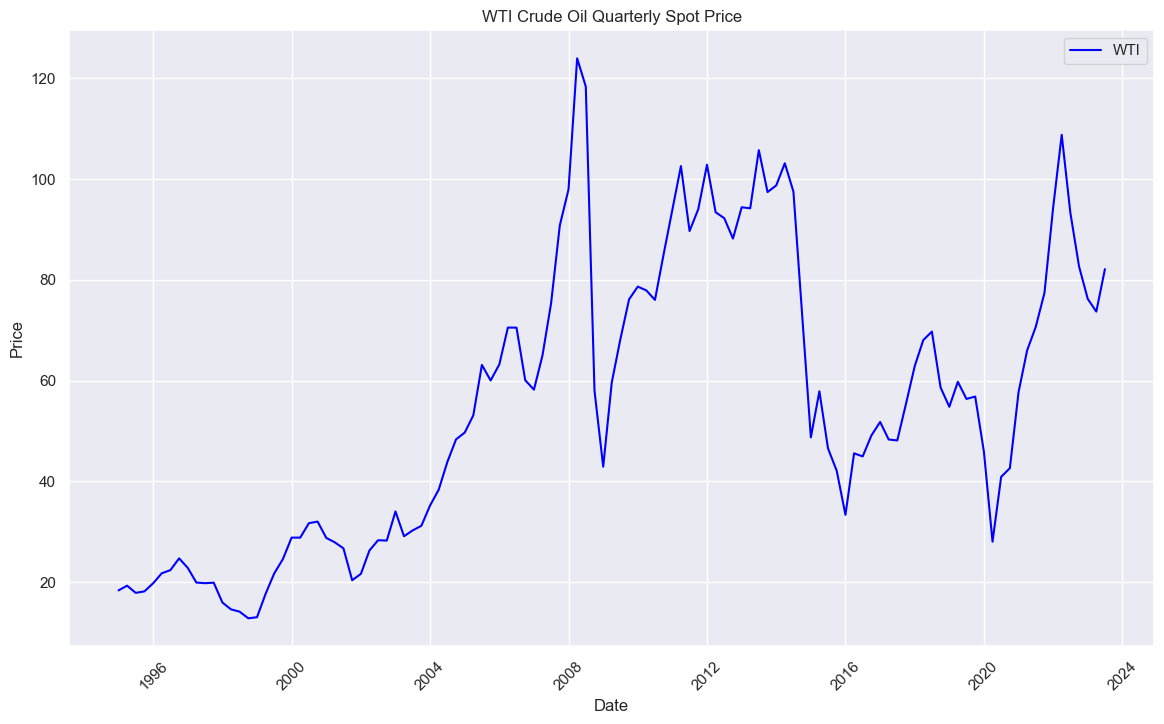

In [41]:
plt.figure(figsize=(14, 8)) 
#plt.plot(df['POILBREUSDM'], label='Brent', color='blue')
plt.plot(df['POILWTIUSDQ'], label='WTI', color='blue')
#plt.plot(df['POILDUBUSDM'], label='Dubai', color='green')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('WTI Crude Oil Quarterly Spot Price')

plt.xticks(rotation=45)

plt.legend()
plt.show()

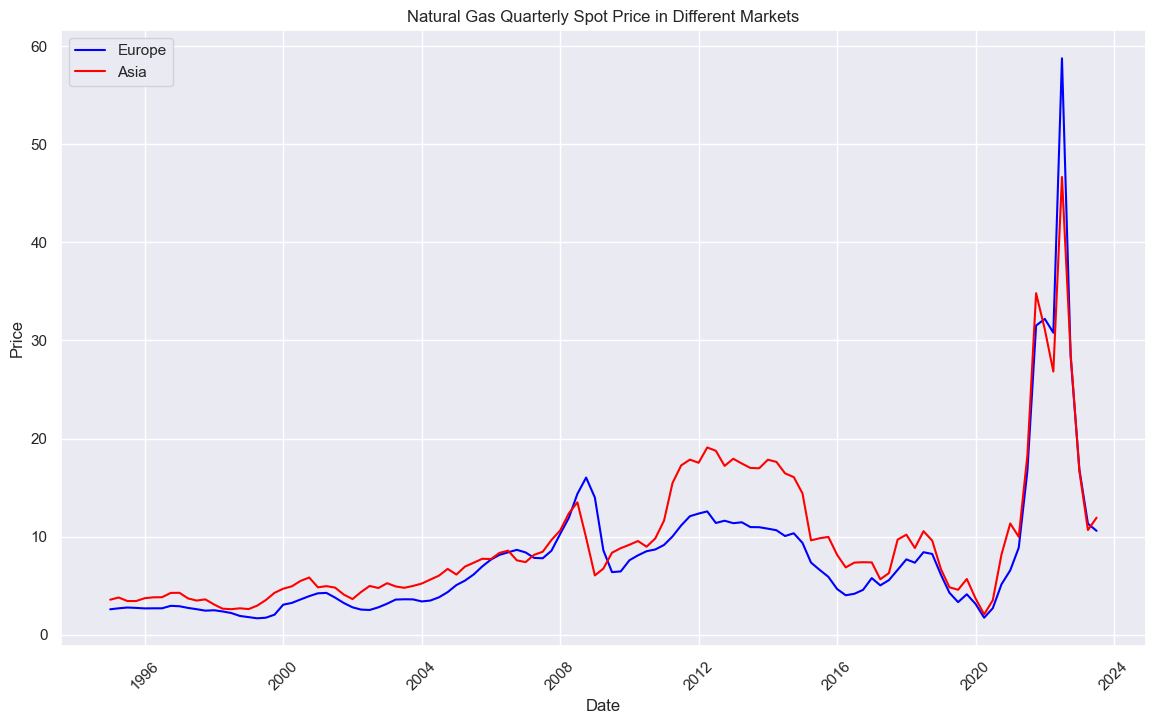

In [42]:
plt.figure(figsize=(14, 8)) 
plt.plot(df['PNGASEUUSDQ'], label='Europe', color='blue')
#plt.plot(df['MHHNGSP'], label='North America', color='red')
plt.plot(df['PNGASJPUSDQ'], label='Asia', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Quarterly Spot Price in Different Markets')

plt.xticks(rotation=45)

plt.legend()
plt.show()